In [1]:
import importlib
import gptree
importlib.reload(gptree)
from gptree import *
from funcs import *
import numpy as np
import random
"""import gp
importlib.reload(gp)
from gp import *"""
import pandas as pd

import gp_fijando_operaciones
importlib.reload(gp_fijando_operaciones)
from gp_fijando_operaciones import *

In [2]:

csvfile = pd.read_csv('unknown_function.csv')
x=csvfile['x'].values
print(x.shape)
y=csvfile['y'].values
print(y.shape)

(10900,)
(10900,)


**Parámetros**

In [3]:
funcdict = {
	'add' : 5,
	'sub' : 4,
	'mul' : 4,
	'div' : 4,
	'inv' : 3,
	'log' : 5,
	'sqrt' : 2,
	'exp' : 2,
	'max' : 2,
	'min' : 2,
	'floor' : 3
}

#gp = GP(M=500, max_depth=50, prob_node_symb=0.3, func_list=list(funcdict.keys()), depth_penalty=0.005)
#res = gp.execute(x,y, generations=100)
#res

gp_fijando_operaciones = GP(M=500, max_depth=50, prob_node_symb=0.5, func_list=list(funcdict.keys()), prob_func=list(funcdict.values()), elitism=0.05, depth_penalty=0.005)
res = gp_fijando_operaciones.execute(x,y, generations=50)
res


c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:39: RuntimeWarning: overflow encountered in exp
  return np.where(np.abs(x1) > INV_THRESHOLD, np.exp(np.abs(x1)), 0)
c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:20: RuntimeWarning: overflow encountered in multiply
  return self.operator(*args)
c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:35: RuntimeWarning: overflow encountered in divide
  return np.where(np.abs(x2) > INV_THRESHOLD, x1/x2, x1)
Progress:  44%|████▍     | 22/50 [00:20<00:26,  1.05it/s]c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\gp_fijando_operaciones.py:11: RuntimeWarning: overflow encountered in power
  return np.average(np.power(y-y_pred,2), weights=w)
Progress:  60%|██████    | 30/50 [00:28<00:22,  1.11s/it]c:\Users\ASUS\Documents\MASTER\computacion evolutiva\Practica3\c_evol\funcs.py:20: RuntimeWarning: invalid value encountered in subtract
  ret

{'total_generations': 50,
 'best_fitness': array([188.34486262, 161.47588438,  80.60037263,  50.28911584,
         27.60381775,  20.68093655,  20.68093655,  20.68093655,
         20.68093655,  20.68093655,  20.68093655,  19.66965528,
         19.66965528,  19.66965528,  19.25827162,  19.25827162,
         19.25827162,  19.25827162,  13.08412567,  13.08412567,
         13.08412567,   9.63920752,   9.63920752,   9.53171965,
          9.43096071,   9.26966996,   9.0898596 ,   9.0898596 ,
          8.96874436,   8.99997059,   8.84502352,   8.81026718,
          8.69086425,   8.69086425,   8.69086425,   8.62072762,
          8.62072762,   8.41278121,   8.41278121,   8.38031669,
          8.38031669,   8.37774017,   8.15488933,   8.12406592,
          8.12406592,   8.0881401 ,   8.10117264,   8.02720812,
          8.03865924,   8.03865924,   8.03865924]),
 'best_trees': array([Node(div), Node(div), Node(div), Node(div), Node(div), Node(div),
        Node(div), Node(div), Node(div), Node(div)

**Mejor fitness con y sin penalización**

In [4]:
print('best fitness: \t' +  str(res['best_fitness'][-1]))
print('best fitness penalizado:\t' +  str(res['best_fitness_p'][-1]))

best fitness: 	8.038659240165185
best fitness penalizado:	8.963105052784181


**Gráfica árbol**

In [5]:
(res["best_trees"][-1]).pprint()


  div___________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________
 /                                                                                                                                                                                                                                                                                                                                      \
x          _____________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________log
        

**Ecuación**

In [6]:
print(res['best_trees'][-1])

div(x,log(sub(x,div(mul(0.8453192533197691,add(x,sqrt(mul(sqrt(sub(x,div(mul(0.8453192533197691,add(mul(0.8453192533197691,add(mul(0.8453192533197691,add(x,sqrt(mul(sqrt(mul(sqrt(x),x)),x)))),sqrt(mul(sqrt(mul(sqrt(sqrt(mul(sqrt(x),1.3622764492192712))),x)),x)))),sqrt(mul(sqrt(mul(sqrt(sqrt(mul(sqrt(x),x))),x)),x)))),1.3622764492192712))),x)))),1.3622764492192712))))


**Gráficos**

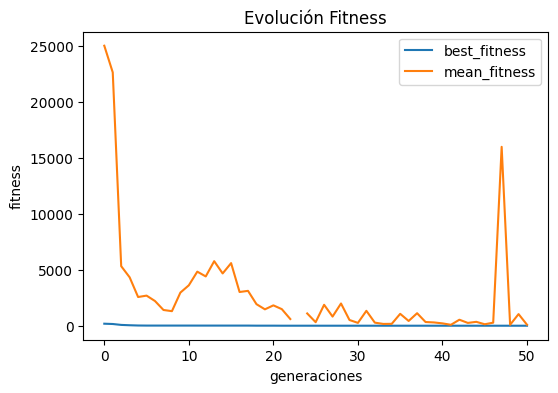

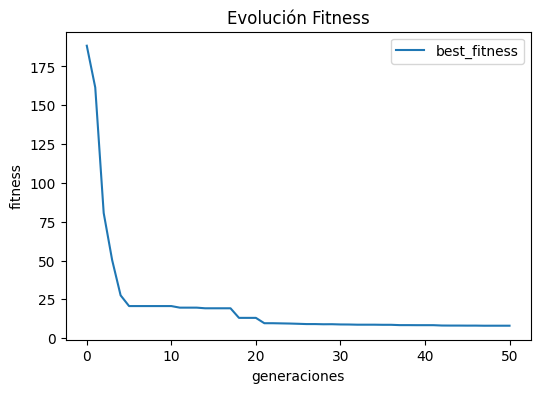

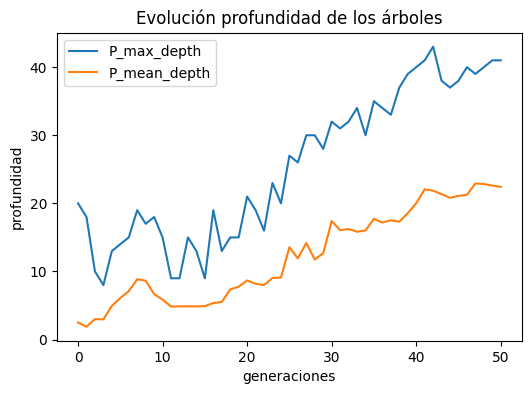

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.plot(res['mean_fitness'], label='mean_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['best_fitness'], label='best_fitness')
plt.title("Evolución Fitness")
plt.ylabel('fitness')
plt.xlabel('generaciones')
plt.legend()

plt.figure(figsize=(6,4))
plt.plot(res['P_max_depth'], label='P_max_depth')
plt.plot(res['P_mean_depth'], label='P_mean_depth')
plt.title("Evolución profundidad de los árboles")
plt.ylabel('profundidad')
plt.xlabel('generaciones')
plt.legend()